In [1]:
%cd /content/drive/MyDrive/Colab\ Notebooks/머신러닝/반도체/Fabrication

/content/drive/MyDrive/Colab Notebooks/머신러닝/반도체/Fabrication


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocess**

In [3]:
df1 = pd.read_csv('uci-secom.csv')
df1.head(3)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.1,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1


In [4]:
df1.shape

(1567, 592)

In [5]:
cond1 = df1.sum()==0
cond1 = pd.DataFrame(cond1)
drop = cond1[cond1[0]==True].reset_index()['index'].tolist()
drop.append('Time') # Time 제거
df1.drop(drop, axis = 1, inplace = True) # DataFrame의 value가 0인 columns 제거

In [6]:
df1.shape

(1567, 479)

In [7]:
dfc = df1.corr()
dfc 

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,0.006515,0.043577,0.010386,-0.007089,0.030712,-0.005753,0.012637,0.017732,-0.009056,0.025855,-0.011095,0.032250,-0.046777,-0.014996,0.108831,0.093141,0.107867,0.054726,-0.030968,-0.039721,-0.056917,-0.004651,-0.034064,-0.017684,-0.004547,0.017684,-0.035680,-0.042325,-0.034963,-0.009255,...,-0.016389,0.043536,-0.097446,-0.018590,0.032672,-0.078370,-0.012831,0.029295,0.041462,0.040574,0.037971,-0.010202,-0.008485,0.062718,0.043835,0.060983,0.044466,0.063916,0.052937,-0.018956,-0.023184,0.013679,-0.002068,0.015208,0.006989,0.013230,0.008603,-0.033438,-0.070715,-0.070137,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144
1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,0.009662,-0.026941,0.034120,-0.037842,-0.087535,-0.001882,-0.009839,0.043082,-0.003228,0.032798,0.058194,-0.052703,-0.016082,-0.060557,0.004642,-0.024070,0.003654,-0.022929,0.001674,0.052150,-0.051473,-0.044646,-0.021574,-0.060587,-0.065780,0.060588,-0.008573,0.008537,-0.055916,0.027218,...,0.005062,-0.017155,0.041873,0.008870,-0.026981,0.026624,0.002110,-0.039599,-0.027722,-0.019215,-0.025514,0.042499,0.022497,-0.015725,-0.023474,-0.011203,-0.023128,-0.019523,-0.029128,-0.009000,-0.037974,0.001753,-0.011474,0.001303,-0.008860,0.002570,-0.010149,-0.018035,0.075029,0.073211,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615
2,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,0.069989,0.036389,0.018356,0.006507,0.006126,-0.000788,-0.004921,0.021933,-0.029347,0.015507,0.044606,-0.029901,0.009320,-0.021233,-0.026546,-0.027613,-0.025827,-0.061986,0.050220,0.062641,-0.007433,-0.023376,-0.042976,0.004004,0.015174,-0.004005,-0.003217,-0.008937,-0.004726,-0.015107,...,0.016211,-0.013097,0.015439,0.013306,-0.004940,0.016972,0.018293,0.029946,0.028729,0.026991,0.026108,0.014599,-0.022503,0.055306,0.048558,0.055462,0.043296,0.055366,0.070879,-0.037073,-0.015716,-0.000518,-0.030692,0.001342,-0.035068,0.002593,-0.028713,-0.030516,-0.025474,-0.018721,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957
3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,0.050137,0.040687,-0.028384,-0.020006,-0.013236,-0.004614,0.042889,-0.028810,0.040405,0.038042,0.021166,-0.033202,-0.008007,-0.049772,0.079853,0.036201,0.085477,0.097231,-0.013400,0.001726,-0.109033,-0.020663,-0.041257,-0.006229,0.055826,0.006229,-0.000777,-0.053991,0.021367,-0.006555,...,-0.022228,-0.055515,-0.030192,-0.025807,-0.064585,-0.021121,-0.018825,0.082772,0.026063,0.013800,0.015054,0.045370,-0.023933,0.012127,0.031994,0.012553,0.034461,0.009237,0.048933,0.002231,-0.017952,0.007636,0.013171,0.006824,0.006914,0.008218,0.016443,0.020209,-0.069807,-0.057051,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631
4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,-0.006478,-0.000987,-0.002711,-0.017607,0.011456,-0.001763,0.000285,-0.001613,0.007163,0.012855,0.008371,-0.007784,0.004985,-0.013676,0.028321,0.011105,0.028700,0.007778,-0.012957,0.001948,-0.035355,-0.005512,0.012204,0.002128,-0.006195,-0.002128,0.005180,-0.016073,0.011931,0.025982,...,-0.012642,-0.015689,-0.003898,-0.013593,-0.022430,0.005402,-0.010680,-0.024565,-0.027357,-0.028995,-0.026045,0.042157,0.033357,-0.010906,0.041405,-0.015193,0.037458,-0.012970,0.027972,0.005273,-0.082592,-0.012027,-0.016543,-0.012267,-0.017898,-0.012166,-0.004072,-0.074882,-0.048197,-0.041290,0.08

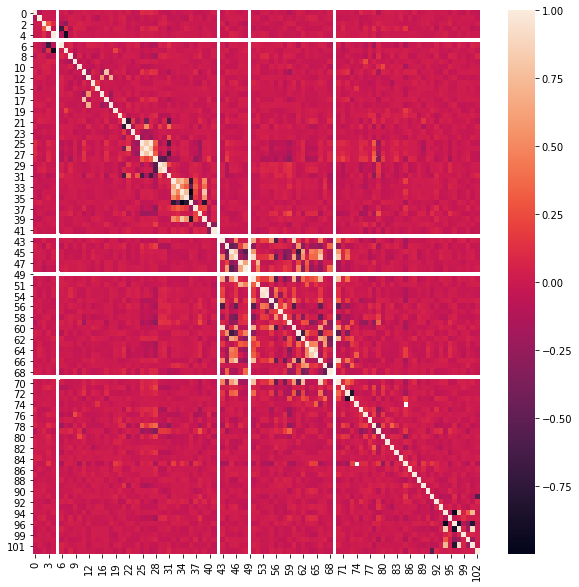

In [8]:
plt.figure(figsize = [10,10])
sns.heatmap(dfc.iloc[:100, :100])

In [9]:
col_list = dfc.columns.values
del_list = []

for i in col_list:
  if dfc[i].isnull().sum() == len(col_list):
    del_list.append(i)
del_list

['5', '42', '49', '69']

In [10]:
df1.drop(del_list, axis = 1, inplace = True) # Correlation이 Nan인 columns 제거
df1.shape

(1567, 475)

In [11]:
nanratio = df1.isnull().sum() / len(df1.index) * 100
nan_list = nanratio[nanratio.values >= 50].index.tolist()
df1.drop(nan_list, axis = 1, inplace = True) # 결측치 비율이 50%이상인 columns 제거

In [12]:
df1.shape

(1567, 447)

In [13]:
!pip install impyute
# https://dining-developer.tistory.com/19 // https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=youji4ever&logNo=222013171055

In [14]:
from impyute.imputation.cs import fast_knn

imputed = fast_knn(df1.values, k=5)# KNN 학습 
df1_imputed = pd.DataFrame(imputed) # KNN을 이용하여 feature 간 상관을 고려하여 결측치 생성

In [15]:
df1_imputed.isnull().sum().sum()

0

In [16]:
df1_imputed.rename(columns = {446:'Pass/Fail'}, inplace = True)
df1_imputed.shape

(1567, 447)

In [17]:
df1_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,0.945500,202.439600,7.955800,414.871000,10.043300,0.968000,192.396300,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,257.139290,0.664887,6.908258,0.138202,2.756147,0.056917,2.683612,20.536025,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.019916,0.013487,0.004626,69.95087,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,0.962700,200.547000,10.154800,414.734700,9.259900,0.970100,191.287200,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,256.845517,0.710980,6.855351,0.185702,2.783945,0.071732,2.692987,25.681234,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.20450,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,0.961500,202.017900,9.515700,416.707500,9.314400,0.967400,192.703500,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064000,0.903200,1.100000,0.621900,0.412200,0.256200,0.411900,68.848900,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.86020,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,0.962900,201.848200,9.605200,422.289400,9.692400,0.968700,192.155700,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228000,0.651100,7.320000,0.163000,3.561100,0.067000,2.729000,25.036300,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.84320,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,0.956900,201.942400,10.566100,420.592500,10.338700,0.973500,191.603700,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,258.525852,0.718943,8.906338,0.206110,3.579638,0.082788,3.455816,28.407834,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.84320,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,0.957900,203.986700,11.769200,419.340400,10.239700,0.969300,193.747000,12

In [18]:
df1_imputed['Pass/Fail'].value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [19]:
df1_imputed['Pass/Fail'].replace(-1.0, 0, inplace = True) # BCE를 사용하기 위해 -1.0 ==> 0

In [20]:
df1_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,0.945500,202.439600,7.955800,414.871000,10.043300,0.968000,192.396300,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,257.139290,0.664887,6.908258,0.138202,2.756147,0.056917,2.683612,20.536025,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.019916,0.013487,0.004626,69.95087,0.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,0.962700,200.547000,10.154800,414.734700,9.259900,0.970100,191.287200,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,256.845517,0.710980,6.855351,0.185702,2.783945,0.071732,2.692987,25.681234,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.20450,0.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,0.961500,202.017900,9.515700,416.707500,9.314400,0.967400,192.703500,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064000,0.903200,1.100000,0.621900,0.412200,0.256200,0.411900,68.848900,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.86020,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,0.962900,201.848200,9.605200,422.289400,9.692400,0.968700,192.155700,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228000,0.651100,7.320000,0.163000,3.561100,0.067000,2.729000,25.036300,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.84320,0.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,0.956900,201.942400,10.566100,420.592500,10.338700,0.973500,191.603700,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,258.525852,0.718943,8.906338,0.206110,3.579638,0.082788,3.455816,28.407834,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.84320,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,0.957900,203.986700,11.769200,419.340400,10.239700,0.969300,193.747000,12.537

# **1. SMOTE - LightGBM**

In [21]:
X_df = df1_imputed.iloc[:,:-1]
Y_df = df1_imputed.iloc[:,-1]

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_df_over, Y_df_over = smote.fit_sample(X_df, Y_df)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_df.shape, Y_df.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_df_over.shape, Y_df_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(Y_df_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1567, 446) (1567,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2926, 446) (2926,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    1463
0.0    1463
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df_over, Y_df_over, test_size = 0.2, stratify = Y_df_over) # stratify : 분포를 비슷하게 만듦
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, stratify = Y_train)

print(pd.DataFrame(Y_train).value_counts())
print(pd.DataFrame(Y_test).value_counts())
print(pd.DataFrame(Y_val).value_counts())

1.0    1053
0.0    1053
dtype: int64
1.0    293
0.0    293
dtype: int64
1.0    117
0.0    117
dtype: int64


In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
lgbm_clf = LGBMClassifier(n_estimators=1000)

evals = [(X_val, Y_val)]
lgbm_clf.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_clf.predict(X_test)

[1]	valid_0's binary_logloss: 0.641693	valid_0's binary_logloss: 0.641693
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.593159	valid_0's binary_logloss: 0.593159
[3]	valid_0's binary_logloss: 0.550637	valid_0's binary_logloss: 0.550637
[4]	valid_0's binary_logloss: 0.516675	valid_0's binary_logloss: 0.516675
[5]	valid_0's binary_logloss: 0.482838	valid_0's binary_logloss: 0.482838
[6]	valid_0's binary_logloss: 0.456661	valid_0's binary_logloss: 0.456661
[7]	valid_0's binary_logloss: 0.434872	valid_0's binary_logloss: 0.434872
[8]	valid_0's binary_logloss: 0.411617	valid_0's binary_logloss: 0.411617
[9]	valid_0's binary_logloss: 0.392082	valid_0's binary_logloss: 0.392082
[10]	valid_0's binary_logloss: 0.373782	valid_0's binary_logloss: 0.373782
[11]	valid_0's binary_logloss: 0.356438	valid_0's binary_logloss: 0.356438
[12]	valid_0's binary_logloss: 0.342454	valid_0's binary_logloss: 0.342454
[13]	valid_0's binary_logloss: 0.319604	valid_

In [25]:
def clf_eval(Y, pred):
  confusion = confusion_matrix(Y, pred)
  accuracy = accuracy_score(Y, pred)
  precision = precision_score(Y, pred)
  recall = recall_score(Y, pred)
  f1 = f1_score(Y, pred)
  print('오차행렬 : ','\n',confusion)
  print('acc : {0}, precision : {1}, recall : {2}, f1_score : {3}'.format(accuracy, precision, recall,f1))
  
clf_eval(Y_test, pred)

오차행렬 :  
 [[286   7]
 [  2 291]]
acc : 0.984641638225256, precision : 0.9765100671140939, recall : 0.9931740614334471, f1_score : 0.984771573604061


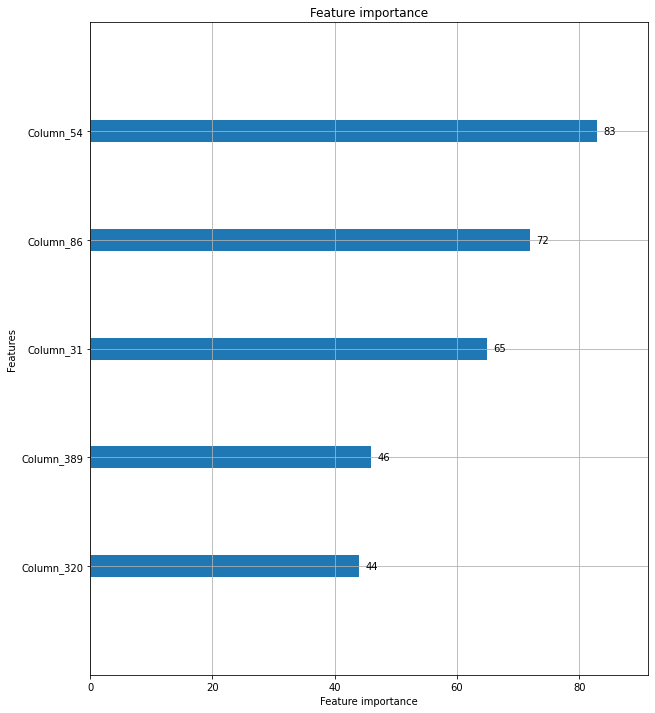

In [26]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_clf, ax=ax, max_num_features=5)

**Data Analysis**

In [27]:
df_nor = df1_imputed[df1_imputed['Pass/Fail'] == 1] # 정상 데이터
df_non = df1_imputed[df1_imputed['Pass/Fail'] != 1] # 비정상 데이터

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

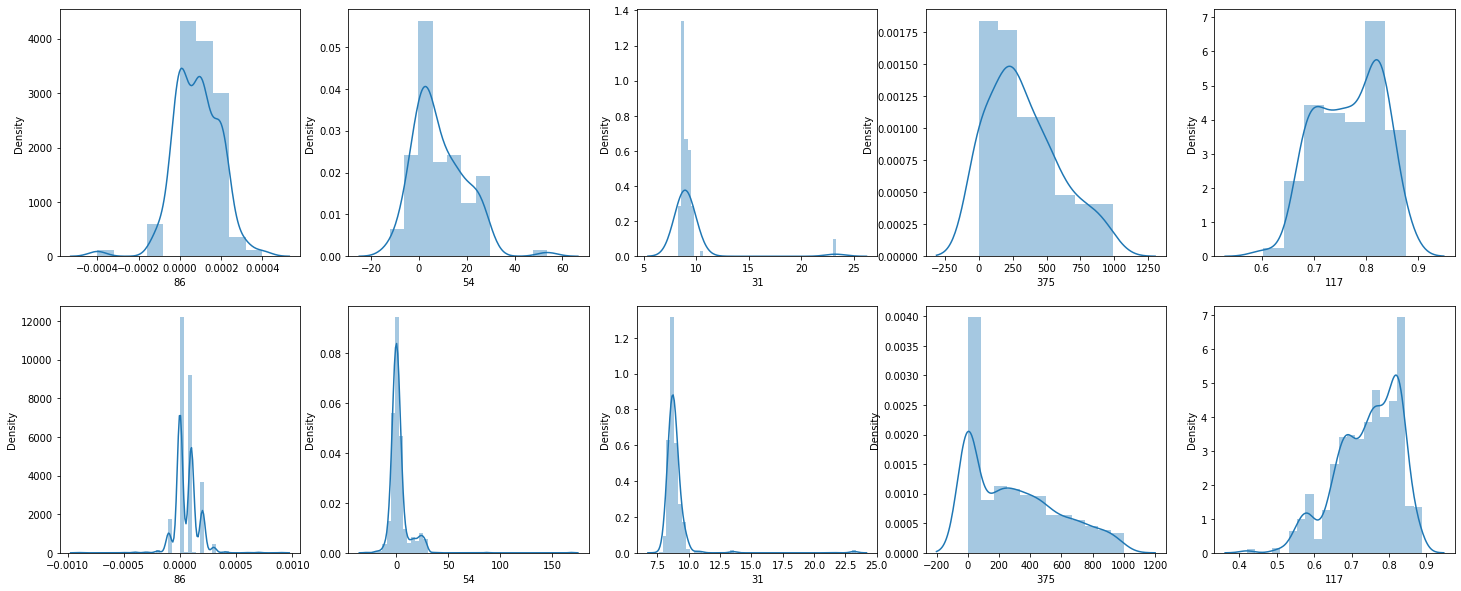

In [28]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10))= plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(25,10)
sns.distplot(df_nor[86], ax = ax1)
sns.distplot(df_nor[54], ax = ax2)
sns.distplot(df_nor[31], ax = ax3)
sns.distplot(df_nor[375], ax = ax4)
sns.distplot(df_nor[117], ax = ax5)
sns.distplot(df_non[86], ax = ax6)
sns.distplot(df_non[54], ax = ax7)
sns.distplot(df_non[31], ax = ax8)
sns.distplot(df_non[375], ax = ax9)
sns.distplot(df_non[117], ax = ax10)

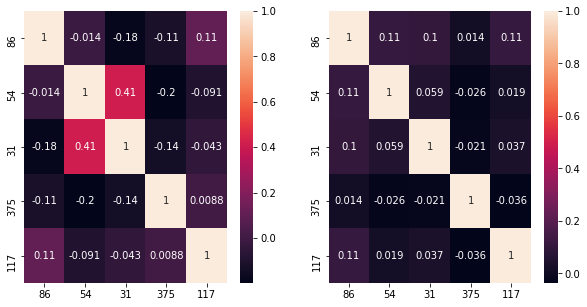

In [29]:
col = [86, 54, 31, 375, 117]

cor1 = df_nor[col]
corr = cor1.corr()

cor2 = df_non[col]
corr2 = cor2.corr()

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
sns.heatmap(corr, annot=True, fmt='.2g', ax = ax1)
sns.heatmap(corr2, annot=True, fmt='.2g', ax = ax2)

# **2. SMOTE - Tensorflow**

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
Xs_train = scaler.transform(X_train) #

scaler.fit(X_test)
Xs_test = scaler.transform(X_test) #

scaler.fit(X_val) 
Xs_val = scaler.transform(X_val) #

In [31]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [32]:
model = Sequential(
    [
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid"),
    ]
)

In [33]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)

In [34]:
model.fit(Xs_train, Y_train, batch_size = 20, epochs = 30, verbose=1, validation_data=(Xs_val, Y_val))

Epoch 1/30
106/106 [==============================] - 8s 14ms/step - loss: 0.5647 - fn: 123.3019 - fp: 118.6981 - tn: 418.0378 - tp: 409.8302 - precision: 0.7280 - recall: 0.7171 - val_loss: 0.4030 - val_fn: 197.0000 - val_fp: 200.9167 - val_tn: 913.1667 - val_tp: 924.4167 - val_precision: 0.8214 - val_recall: 0.8242
Epoch 2/30
106/106 [==============================] - 1s 5ms/step - loss: 0.8871 - fn: 263.7547 - fp: 266.1604 - tn: 1443.0850 - tp: 1436.8679 - precision: 0.8420 - recall: 0.8439 - val_loss: 1.1793 - val_fn: 342.1667 - val_fp: 318.5000 - val_tn: 1965.5834 - val_tp: 1949.2500 - val_precision: 0.8595 - val_recall: 0.8507
Epoch 3/30
106/106 [==============================] - 1s 5ms/step - loss: 0.5055 - fn: 398.9340 - fp: 370.8585 - tn: 2505.8962 - tp: 2474.1792 - precision: 0.8692 - recall: 0.8605 - val_loss: 0.3435 - val_fn: 442.0833 - val_fp: 417.0000 - val_tn: 3037.0833 - val_tp: 3019.3333 - val_precision: 0.8786 - val_recall: 0.8723
Epoch 4/30
106/106 [=================

In [35]:
pred = model.predict(Xs_test)

In [ ]:
pred = pd.DataFrame(pred)

In [37]:
cond1 = pred[0].values >= 0.5
cond2 = pred[0].values < 0.5
pred[cond1] = 1
pred[cond2] = 0

In [38]:
pred = pred.values

In [39]:
clf_eval(Y_test, pred)

오차행렬 :  
 [[280  13]
 [  8 285]]
acc : 0.9641638225255973, precision : 0.9563758389261745, recall : 0.9726962457337884, f1_score : 0.9644670050761421
